In [1]:
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp


In [39]:
yp_df = pd.read_excel("../data/moving_population/ingu_hour_yeungdeungpo.xlsx",sheet_name=0)

In [4]:
yp_df.describe()

,date,hour,longitude,latitude,gu_code,dong_code,under10_ingu,under20_ingu,under30_ingu,under40_ingu,...,upper80_male_ingu,under10_female_ingu,under20_female_ingu,under30_female_ingu,under40_female_ingu,under50_female_ingu,under60_female_ingu,under70_female_ingu,under80_female_ingu,upper80_female_ingu
count,211426.0,211426.000000,211426.000000,211426.000000,211426.0,2.114260e+05,211426.000000,211426.000000,211426.000000,211426.000000,...,211426.000000,211426.000000,211426.000000,211426.000000,211426.000000,211426.000000,211426.000000,211426.000000,211426.000000,211426.000000
mean,20190911.0,11.511933,126.908673,37.520760,11560.0,1.156059e+09,0.228387,1.253968,3.204543,4.775726,...,0.181288,0.131913,0.604070,1.727053,2.209978,2.103090,1.832086,1.414956,0.695179,0.204815
std,0.0,6.919037,0.015823,0.014318,0.0,6.024133e+03,0.339337,1.819190,5.565384,8.187178,...,0.254748,0.202012,0.903035,3.148774,3.714099,3.088622,2.483981,1.825269,0.929653,0.276714
min,20190911.0,0.000000,126.878273,37.485439,11560.0,1.156052e+09,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20190911.0,6.000000,126.896687,37.511520,11560.0,1.156054e+09,0.009036,0.079011,0.302090,0.485646,...,0.009166,0.002638,0.035644,0.147897,0.208485,0.188384,0.160412,0.113010,0.045846,0.011342
50%,20190911.0,12.000000,126.906707,37.521555,11560.0,1.156056e+09,0.115537,0.661187,1.604891,2.448828,...,0.106722,0.062470,0.310205,0.820556,1.144200,1.209982,1.137155,0.909676,0.443922,0.123530
75%,20190911.0,18.000000,126.919405,37.530913,11560.0,1.156062e+09,0.309218,1.687028,3.740847,5.649971,...,0.251459,0.178894,0.803419,1.960525,2.652754,2.689145,2.484599,1.966359,0.975287,0.285818
max,20190911.0,23.000000,126.949853,37.555643,11560.0,1.156072e+09,5.971869,30.339455,138.267928,222.507677,...,6.825863,3.836334,18.295030,82.540771,90.543966,60.862535,47.005390,57.673513,51.395132,7.455296


In [35]:
yp_df_debug = yp_df.loc[:,['hour','under40_ingu','under40_male_ingu','under40_female_ingu']]
yp_df_debug

,hour,under40_ingu,under40_male_ingu,under40_female_ingu
0,0,5.060689,2.620277,2.440412
1,0,8.151856,4.607122,3.544734
2,0,1.070060,0.652133,0.417927
3,0,10.584853,5.180394,5.404459
4,0,2.915421,1.585708,1.329714
...,...,...,...,...
211421,23,3.621903,1.906360,1.715543
211422,23,11.491260,6.690967,4.800293
211423,23,6.043692,3.087390,2.956302
211424,23,1.740849,0.921187,0.819663


In [36]:
x = yp_df_debug.groupby('hour').sum()
x['debug'] = x.apply(lambda row:row['under40_male_ingu']+row['under40_female_ingu'],axis=1)
x

,under40_ingu,under40_male_ingu,under40_female_ingu,debug
hour,,,,
0,35296.808777,18902.403664,16394.405113,35296.808777
1,34898.734593,18640.863312,16257.871281,34898.734593
2,34496.777934,18403.949750,16092.828184,34496.777934
3,34289.909352,18234.471277,16055.438075,34289.909352
4,34156.360029,18131.543055,16024.816974,34156.360029
5,34367.110132,18260.077264,16107.032868,34367.110132
6,35676.025422,19191.227824,16484.797598,35676.025422
7,43849.349269,23908.536643,19940.812626,43849.349269
8,49871.921932,27205.436624,22666.485308,49871.921932


In [5]:
yp_df.head()

,date,hour,longitude,latitude,gu_code,gu_name,dong_code,dong_name,under10_ingu,under20_ingu,...,upper80_male_ingu,under10_female_ingu,under20_female_ingu,under30_female_ingu,under40_female_ingu,under50_female_ingu,under60_female_ingu,under70_female_ingu,under80_female_ingu,upper80_female_ingu
0,20190911,0,126.904651,37.510243,11560,영등포구,1156051500,영등포본동,0.477690,2.295678,...,0.291999,0.291928,0.916024,1.710428,2.440412,3.262780,2.892460,2.045463,1.043423,0.272596
1,20190911,0,126.917051,37.516164,11560,영등포구,1156051500,영등포본동,0.261749,2.162063,...,0.387504,0.149363,0.938860,3.624611,3.544734,2.772231,2.820026,2.407307,1.139865,0.194348
2,20190911,0,126.911425,37.512080,11560,영등포구,1156051500,영등포본동,0.003061,0.223033,...,0.103522,0.003061,0.133585,0.390273,0.417927,0.513422,0.516027,0.547065,0.373192,0.124435
3,20190911,0,126.901812,37.511581,11560,영등포구,1156051500,영등포본동,0.683299,4.209149,...,0.359653,0.265973,1.946447,3.184111,5.404459,4.894257,5.373596,2.858021,1.359324,0.362667
4,20190911,0,126.913667,37.514795,11560,영등포구,1156051500,영등포본동,0.218001,1.505187,...,0.189097,0.141304,0.692433,0.846153,1.329714,1.272188,1.615956,1.570745,0.773648,0.163622


In [40]:
ingu_var = [x for x in yp_df.columns if '_ingu' in x]
print(len(ingu_var))

27


In [52]:
yp_df_2 = pd.melt(yp_df,['hour','gu_name','dong_name'],value_vars=ingu_var,var_name='성별연령대',value_name='인구')
yp_df_2.head()

,hour,gu_name,dong_name,성별연령대,인구
0,0,영등포구,영등포본동,under10_ingu,0.477690
1,0,영등포구,영등포본동,under10_ingu,0.261749
2,0,영등포구,영등포본동,under10_ingu,0.003061
3,0,영등포구,영등포본동,under10_ingu,0.683299
4,0,영등포구,영등포본동,under10_ingu,0.218001


In [53]:
yp_df_2['연령대'] = yp_df_2['성별연령대'].str.slice(stop=7)
yp_df_2.head()

,hour,gu_name,dong_name,성별연령대,인구,연령대
0,0,영등포구,영등포본동,under10_ingu,0.477690,under10
1,0,영등포구,영등포본동,under10_ingu,0.261749,under10
2,0,영등포구,영등포본동,under10_ingu,0.003061,under10
3,0,영등포구,영등포본동,under10_ingu,0.683299,under10
4,0,영등포구,영등포본동,under10_ingu,0.218001,under10


In [54]:
yp_df_2['성별'] = yp_df_2['성별연령대'].str.slice(start=8)
yp_df_2.head()

,hour,gu_name,dong_name,성별연령대,인구,연령대,성별
0,0,영등포구,영등포본동,under10_ingu,0.477690,under10,ingu
1,0,영등포구,영등포본동,under10_ingu,0.261749,under10,ingu
2,0,영등포구,영등포본동,under10_ingu,0.003061,under10,ingu
3,0,영등포구,영등포본동,under10_ingu,0.683299,under10,ingu
4,0,영등포구,영등포본동,under10_ingu,0.218001,under10,ingu


In [58]:
yp_df_2[yp_df_2['성별']=='ingu']['성별'].value_counts()

ingu    1902834
Name: 성별, dtype: int64

In [59]:
yp_df_2[yp_df_2['성별']=='male_ingu']['성별'].value_counts()

male_ingu    1902834
Name: 성별, dtype: int64

In [60]:
yp_df_2[yp_df_2['성별']=='female_ingu']['성별'].value_counts()

female_ingu    1902834
Name: 성별, dtype: int64

In [69]:
yp_df_2_temp = yp_df_2[yp_df_2['성별']=='ingu'].groupby('연령대').sum()
yp_df_2_temp['남성'] = yp_df_2[yp_df_2['성별']=='male_ingu'].groupby('연령대').sum()['인구']
yp_df_2_temp['여성'] = yp_df_2[yp_df_2['성별']=='female_ingu'].groupby('연령대').sum()['인구']

,hour,인구,남성,여성
연령대,,,,
under10,2433922,4.828687e+04,20384.971544,27889.897443
under20,2433922,2.651214e+05,137405.348440,127716.003376
under30,2433922,6.775238e+05,312379.936118,365143.832466
under40,2433922,1.009713e+06,542465.863670,467246.760592
under50,2433922,9.820769e+05,537428.996356,444647.905946
under60,2433922,8.294496e+05,442098.908654,387350.664030
under70,2433922,6.125673e+05,313408.928184,299158.394947
under80,2433922,2.990608e+05,152081.866403,146978.925433
upper80,2433922,6.520807e+05,38328.927985,43303.173608


In [71]:
yp_df_2_temp['남녀합'] = yp_df_2_temp.apply(lambda row:row['남성']+row['여성'],axis=1)
yp_df_2_temp.loc[:,['남성','여성','남녀합','인구']]

,남성,여성,남녀합,인구
연령대,,,,
under10,20384.971544,27889.897443,4.827487e+04,4.828687e+04
under20,137405.348440,127716.003376,2.651214e+05,2.651214e+05
under30,312379.936118,365143.832466,6.775238e+05,6.775238e+05
under40,542465.863670,467246.760592,1.009713e+06,1.009713e+06
under50,537428.996356,444647.905946,9.820769e+05,9.820769e+05
under60,442098.908654,387350.664030,8.294496e+05,8.294496e+05
under70,313408.928184,299158.394947,6.125673e+05,6.125673e+05
under80,152081.866403,146978.925433,2.990608e+05,2.990608e+05
upper80,38328.927985,43303.173608,8.163210e+04,6.520807e+05


In [78]:
yp_df_2_temp.rename(columns={'남성': 'male', '여성': 'female','남녀합':'sum','인구':'ingu'}, inplace=True)

In [82]:
yp_df_2['연령대'].unique()

array(['under10', 'under20', 'under30', 'under40', 'under50', 'under60',
       'under70', 'under80', 'upper80'], dtype=object)

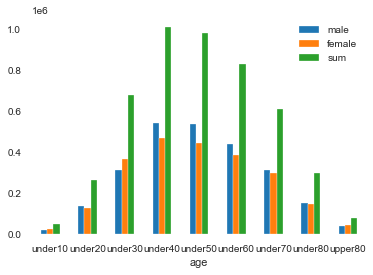

In [100]:
analysis_age = yp_df_2_temp.loc[:,['male','female','sum']]
analysis_age['age'] = yp_df_2['연령대'].unique()
ax = analysis_age.plot.bar(x='age', rot=0)
plt.savefig('analysis_age_yp.png')

In [104]:
analysis_age

,male,female,sum,age
연령대,,,,
under10,20384.971544,27889.897443,4.827487e+04,under10
under20,137405.348440,127716.003376,2.651214e+05,under20
under30,312379.936118,365143.832466,6.775238e+05,under30
under40,542465.863670,467246.760592,1.009713e+06,under40
under50,537428.996356,444647.905946,9.820769e+05,under50
under60,442098.908654,387350.664030,8.294496e+05,under60
under70,313408.928184,299158.394947,6.125673e+05,under70
under80,152081.866403,146978.925433,2.990608e+05,under80
upper80,38328.927985,43303.173608,8.163210e+04,upper80


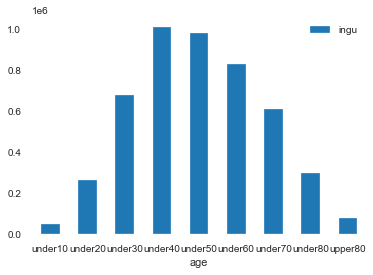

In [110]:
analysis_age.rename(columns={'sum':'ingu'},inplace=True)
ax3 = analysis_age.loc[:,['age','ingu']].plot.bar(x='age',y='ingu',rot=0)
plt.savefig('analysis_age_yp_total.png')

In [111]:
## TODO : 각 연령대 별 시간 표시

## 유동인구가 많은 시간대 파악

In [88]:
yp_df_unisex = yp_df_2[yp_df_2['성별']=='ingu']
yp_df_2 = yp_df_2[yp_df_2['성별']!='ingu']

In [95]:
analysis_time = yp_df_2[yp_df_2['성별']=='male_ingu'].groupby('hour').sum()
analysis_time.rename(columns={'인구':'male'},inplace=True)

analysis_time['female'] = yp_df_2[yp_df_2['성별']=='female_ingu'].groupby('hour').sum()
analysis_time['sum'] = analysis_time.apply(lambda row:row['male']+row['female'],axis=1)
analysis_time

,male,female,sum
hour,,,
0,87645.950411,83666.367734,171312.318146
1,86411.336857,83026.111306,169437.448163
2,85335.966923,82538.623881,167874.590804
3,84328.493369,82029.960605,166358.453975
4,84176.010494,82453.976289,166629.986783
5,85708.062638,82992.007766,168700.070404
6,90665.613583,84714.630578,175380.244161
7,107679.423747,95338.712522,203018.136269
8,119892.442228,106192.185663,226084.627891


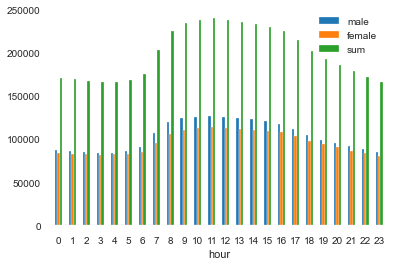

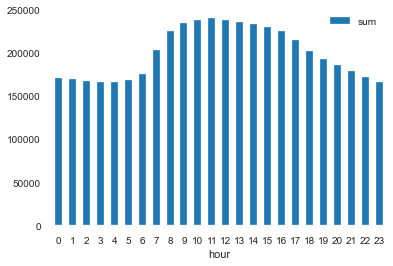

In [98]:
ax = analysis_time.plot.bar( rot=0)
plt.savefig('analysis_time_yp.png')
ax2 = analysis_time.loc[:,['sum']].plot.bar( rot=0)
plt.savefig('analysis_time_yp_total.png')

### 시간대별 연령대 누적 그래프 그리기

In [116]:
male_ingu_var =[x for x in ingu_var if 'male' in x]
female_ingu_var =[x for x in ingu_var if 'female' in x]
print(male_ingu_var)
print(female_ingu_var)

['under10_male_ingu', 'under20_male_ingu', 'under30_male_ingu', 'under40_male_ingu', 'under50_male_ingu', 'under60_male_ingu', 'under70_male_ingu', 'under80_male_ingu', 'upper80_male_ingu', 'under10_female_ingu', 'under20_female_ingu', 'under30_female_ingu', 'under40_female_ingu', 'under50_female_ingu', 'under60_female_ingu', 'under70_female_ingu', 'under80_female_ingu', 'upper80_female_ingu']
['under10_female_ingu', 'under20_female_ingu', 'under30_female_ingu', 'under40_female_ingu', 'under50_female_ingu', 'under60_female_ingu', 'under70_female_ingu', 'under80_female_ingu', 'upper80_female_ingu']


In [119]:
new_ingu_var = [x.split('_')[0] for x in ingu_var if len(x)<13]
yp_df_3 = yp_df.loc[:,['hour','gu_name','dong_name']]
for idx,_var in enumerate(new_ingu_var):
    yp_df_3[_var] = yp_df.apply(lambda row:row[male_ingu_var[idx]]+row[female_ingu_var[idx]],axis=1)


,hour,gu_name,dong_name,under10,under20,under30,under40,under50,under60,under70,under80,upper80
0,0,영등포구,영등포본동,0.477690,2.295678,3.305017,5.060689,5.997692,6.152903,4.062200,2.039465,0.564596
1,0,영등포구,영등포본동,0.261749,2.162063,6.684294,8.151856,6.683275,6.006407,5.489676,2.818753,0.581851
2,0,영등포구,영등포본동,0.003061,0.223033,0.900332,1.070060,1.020792,1.099042,1.286123,0.729360,0.227957
3,0,영등포구,영등포본동,0.683299,4.209149,5.982488,10.584853,10.161853,10.135400,5.988882,2.972929,0.722320
4,0,영등포구,영등포본동,0.218001,1.505187,1.485313,2.915421,2.537644,2.919424,2.955850,1.621038,0.352719
...,...,...,...,...,...,...,...,...,...,...,...,...
211421,23,영등포구,대림3동,0.259839,0.821408,2.701324,3.621903,4.152744,4.013245,3.595510,2.495556,0.542397
211422,23,영등포구,대림3동,0.244041,2.491240,7.304033,11.491260,16.861254,13.723605,10.660398,6.493694,1.531057
211423,23,영등포구,대림3동,0.632651,3.588128,5.111002,6.043692,8.308581,10.072257,8.108533,3.563040,1.025651
211424,23,영등포구,대림3동,0.166330,0.750364,1.342641,1.740849,2.010787,2.348496,1.856038,0.699206,0.151626


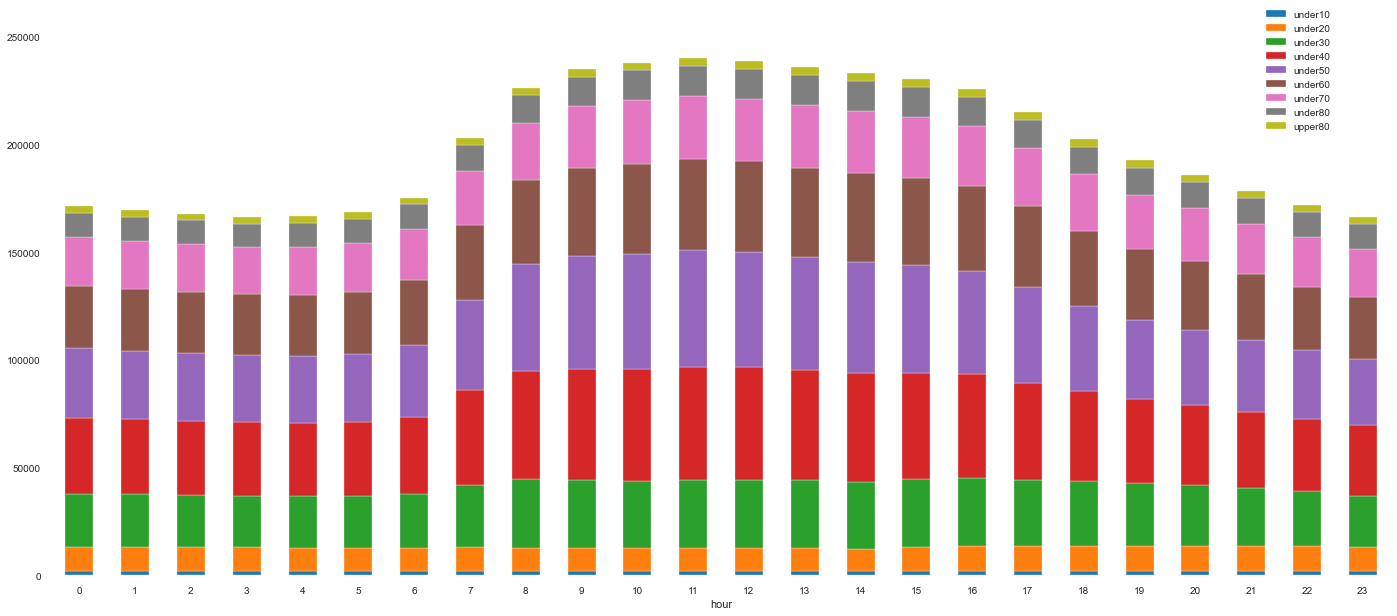

In [145]:
analysis_time_stack = yp_df_3.groupby('hour').sum()
analysis_time_stack['hour'] = yp_df_3['hour'].unique()
ax4 = analysis_time_stack.plot.bar(x='hour',rot=0,stacked=True,figsize=(24, 10))
ax4.legend(bbox_to_anchor=(0.9, 0.8)) 
plt.savefig('analysis_time_yp_total_wrt_age2.png')

In [141]:
# plt.show()


<Figure size 432x288 with 0 Axes>

In [51]:
analysis1_df

,인구,남성,여성,debug
hour,,,,
0,194006.583718,87645.950411,83666.367734,171312.318146
1,191874.727889,86411.336857,83026.111306,169437.448163
2,190111.045369,85335.966923,82538.623881,167874.590804
3,188437.643557,84328.493369,82029.960605,166358.453975
4,188604.621580,84176.010494,82453.976289,166629.986783
5,190179.757706,85708.062638,82992.007766,168700.070404
6,196755.085154,90665.613583,84714.630578,175380.244161
7,225631.257005,107679.423747,95338.712522,203018.136269
8,250176.781598,119892.442228,106192.185663,226084.627891


In [49]:
yp_df_10000_clean.head()

,hour,gu_name,dong_name,성별연령대,인구,연령대,성별
0,0,영등포구,영등포본동,under10_ingu,0.477690,under10,total
1,0,영등포구,영등포본동,under10_ingu,0.261749,under10,total
2,0,영등포구,영등포본동,under10_ingu,0.003061,under10,total
3,0,영등포구,영등포본동,under10_ingu,0.683299,under10,total
4,0,영등포구,영등포본동,under10_ingu,0.218001,under10,total


In [ ]:
mapo_df = pd.read_excel("../data/moving_population/ingu_hour_mapo.xlsx",sheet_name=0)

In [12]:
df = pd.concat([yp_df, mapo_df])
print("Column headings:")
print(df.columns)
print(df.columns)

Column headings:
Index(['date', 'hour', 'longitude', 'latitude', 'gu_code', 'gu_name',
       'dong_code', 'dong_name', 'under10_ingu', 'under20_ingu',
       'under30_ingu', 'under40_ingu', 'under50_ingu', 'under60_ingu',
       'under70_ingu', 'under80_ingu', 'upper80_ingu', 'under10_male_ingu',
       'under20_male_ingu', 'under30_male_ingu', 'under40_male_ingu',
       'under50_male_ingu', 'under60_male_ingu', 'under70_male_ingu',
       'under80_male_ingu', 'upper80_male_ingu', 'under10_female_ingu',
       'under20_female_ingu', 'under30_female_ingu', 'under40_female_ingu',
       'under50_female_ingu', 'under60_female_ingu', 'under70_female_ingu',
       'under80_female_ingu', 'upper80_female_ingu'],
      dtype='object')
Index(['date', 'hour', 'longitude', 'latitude', 'gu_code', 'gu_name',
       'dong_code', 'dong_name', 'under10_ingu', 'under20_ingu',
       'under30_ingu', 'under40_ingu', 'under50_ingu', 'under60_ingu',
       'under70_ingu', 'under80_ingu', 'upper80_ingu', 

In [15]:
info['under80_ingu']

0         2.039465
1         2.818753
2         0.729360
3         2.972929
4         1.621038
5         3.696146
6         1.459867
7         4.050965
8         0.690941
9         2.748141
10        1.611013
11        1.483147
12        0.529442
13        1.363903
14        0.300597
15        0.581599
16        0.748841
17        2.529473
18        2.100494
19        0.589867
20        0.440920
21        0.642770
22        0.647057
23        2.345369
24        3.089817
25        0.638893
26        1.219475
27        2.878496
28        2.672629
29        0.291874
            ...   
211396    2.649142
211397    1.453178
211398    2.679471
211399    2.117583
211400    0.264328
211401    1.816424
211402    0.801409
211403    1.475979
211404    2.598006
211405    3.468964
211406    2.944390
211407    2.570824
211408    2.472064
211409    1.357797
211410    0.518996
211411    0.616811
211412    2.321954
211413    0.763233
211414    1.487381
211415    1.338114
211416    1.326214
211417    3.

In [20]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211426 entries, 0 to 211425
Data columns (total 35 columns):
date                   211426 non-null int64
hour                   211426 non-null int64
longitude              211426 non-null float64
latitude               211426 non-null float64
gu_code                211426 non-null int64
gu_name                211426 non-null object
dong_code              211426 non-null int64
dong_name              211426 non-null object
under10_ingu           211426 non-null float64
under20_ingu           211426 non-null float64
under30_ingu           211426 non-null float64
under40_ingu           211426 non-null float64
under50_ingu           211426 non-null float64
under60_ingu           211426 non-null float64
under70_ingu           211426 non-null float64
under80_ingu           211426 non-null float64
upper80_ingu           211426 non-null float64
under10_male_ingu      211426 non-null float64
under20_male_ingu      211426 non-null float64
under3

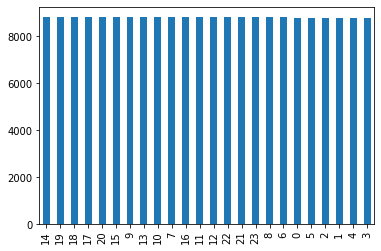

In [25]:
info['hour'].value_counts().plot(kind='bar')

In [24]:
plt.show()

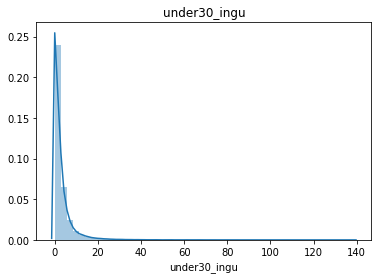

In [29]:
sns.distplot(info.loc[info['under30_ingu'].notnull(), 'under30_ingu'])
plt.title('under30_ingu')
plt.show()


In [34]:
profile = pp.ProfileReport(info, title='Pandas Profiling Report', html={'style':{'full_width':True}})

OptionError: "No such keys(s): 'compute.use_numexpr'"